Problem 1:

Assume a gravitational lens that is a point source.

Lens equation $\beta = \theta - \frac{D_{LS}}{D_{S}D_{L}} \frac{4.0 G M}{c^{2} \theta}$

In [345]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree, KDTree

In [346]:
#function for the Einstein Radius, where D_l and D_s have units of pc, and m has units of kg

def theta_E(D_l, D_s, m):
    
    m_sun = 2.0e30 #solar mass in kg
    m = m*m_sun #to convert mass to solar masses
    c = 299792458.0 #speed of light m/s
    G = 6.67408e-11 #gravitational constant in m^3 kg^-1 s^-2
    pc = 3.086e16 #conversion from pc to m
    D_l = D_l*pc #to convert pc to m
    D_s = D_s*pc #to convert pc to m
    D_ls = (D_s - D_l)*pc #to convert pc to m

    return ((D_ls / (D_s*D_l)) * (4.0*G*m / (c**2.0)))**(1.0/2.0)

In [347]:
def beta(theta, theta_E): #The Lens Equation defined in terms of the Einstein radius

    return theta - theta_E**2 / theta

In [348]:
Ein = theta_E(10e5, 10e6, 3e9) #Lens mass of 3 billion solar masses at 1 Mpc, and 10 Mpc to the lensed image
P_scale = np.radians(0.01 / 60) #Resolution scale of 0.01 arcmin/pixel

In [349]:
x_1 = np.linspace(-10, 10, 1000) #defines linespace in the x direction
y_1 = np.linspace(-10, 10, 1000) #defines linespace in the y direction
X_1, Y_1 = np.meshgrid(x_1,y_1) #combines the x and y linespace into a 2-D gridspace
scalar_1 = 2.0
difX_1, difY_1 = np.meshgrid(np.linspace(-Ein, Ein, 1000), np.linspace(-Ein, Ein, 1000))
difX_1 = difX_1 * scalar_1
difY_1 = difY_1 * scalar_1

In [350]:
theta_pol = np.arctan2(difX_1, difY_1) #conversion to polar
theta_grav = np.sqrt(difX_1**2.0 + difY_1**2.0) #to make theta agree with the resolution of P_scale

beta_grav = beta(theta_grav, Ein)
X_1pol = beta_grav * np.cos(theta_pol) #conversion to polar
Y_1pol = beta_grav * np.sin(theta_pol) #conversion to polar

In [351]:
d_1 = cKDTree(np.array([difX_1.ravel(), difY_1.ravel()]).T)
d, idx = d_1.query(np.array([X_1pol.ravel(), Y_1pol.ravel()]).T, k=1)

In [352]:
#defines a 2D Gaussian to create PSFs for the lens to be applied.
def gauss_2D(x, y, mu_x, mu_y, sigma_x, sigma_y):
    
    norm = 1.0 / (2.0 * np.pi * sigma_x * sigma_y)
    gauss = np.exp(-((x - mu_x)**2.0 / (2.0*sigma_x**2.0) + (y - mu_y)**2.0 / (2.0*sigma_y**2.0)))
    
    return norm * gauss

In [353]:
Z_1 = Gauss_2d(X_1, Y_1, 0, 0, 0.5, 0.5) #creates a PSF directly behind lens
Z_2 = Gauss_2d(X_1, Y_1, -2.5, -2.5, 0.5, 0.5) #creates a PSF on the inside edge of the Einstein radius

In [354]:
#uses KDTree to pull pixel values and generate the lensed images

Val_1 = Z_1.ravel()[idx]
Img_1 = np.asarray(Val_1).reshape(1000, 1000)

Val_2 = Z_2.ravel()[idx]
Img_2 = np.asarray(Val_2).reshape(1000, 1000)

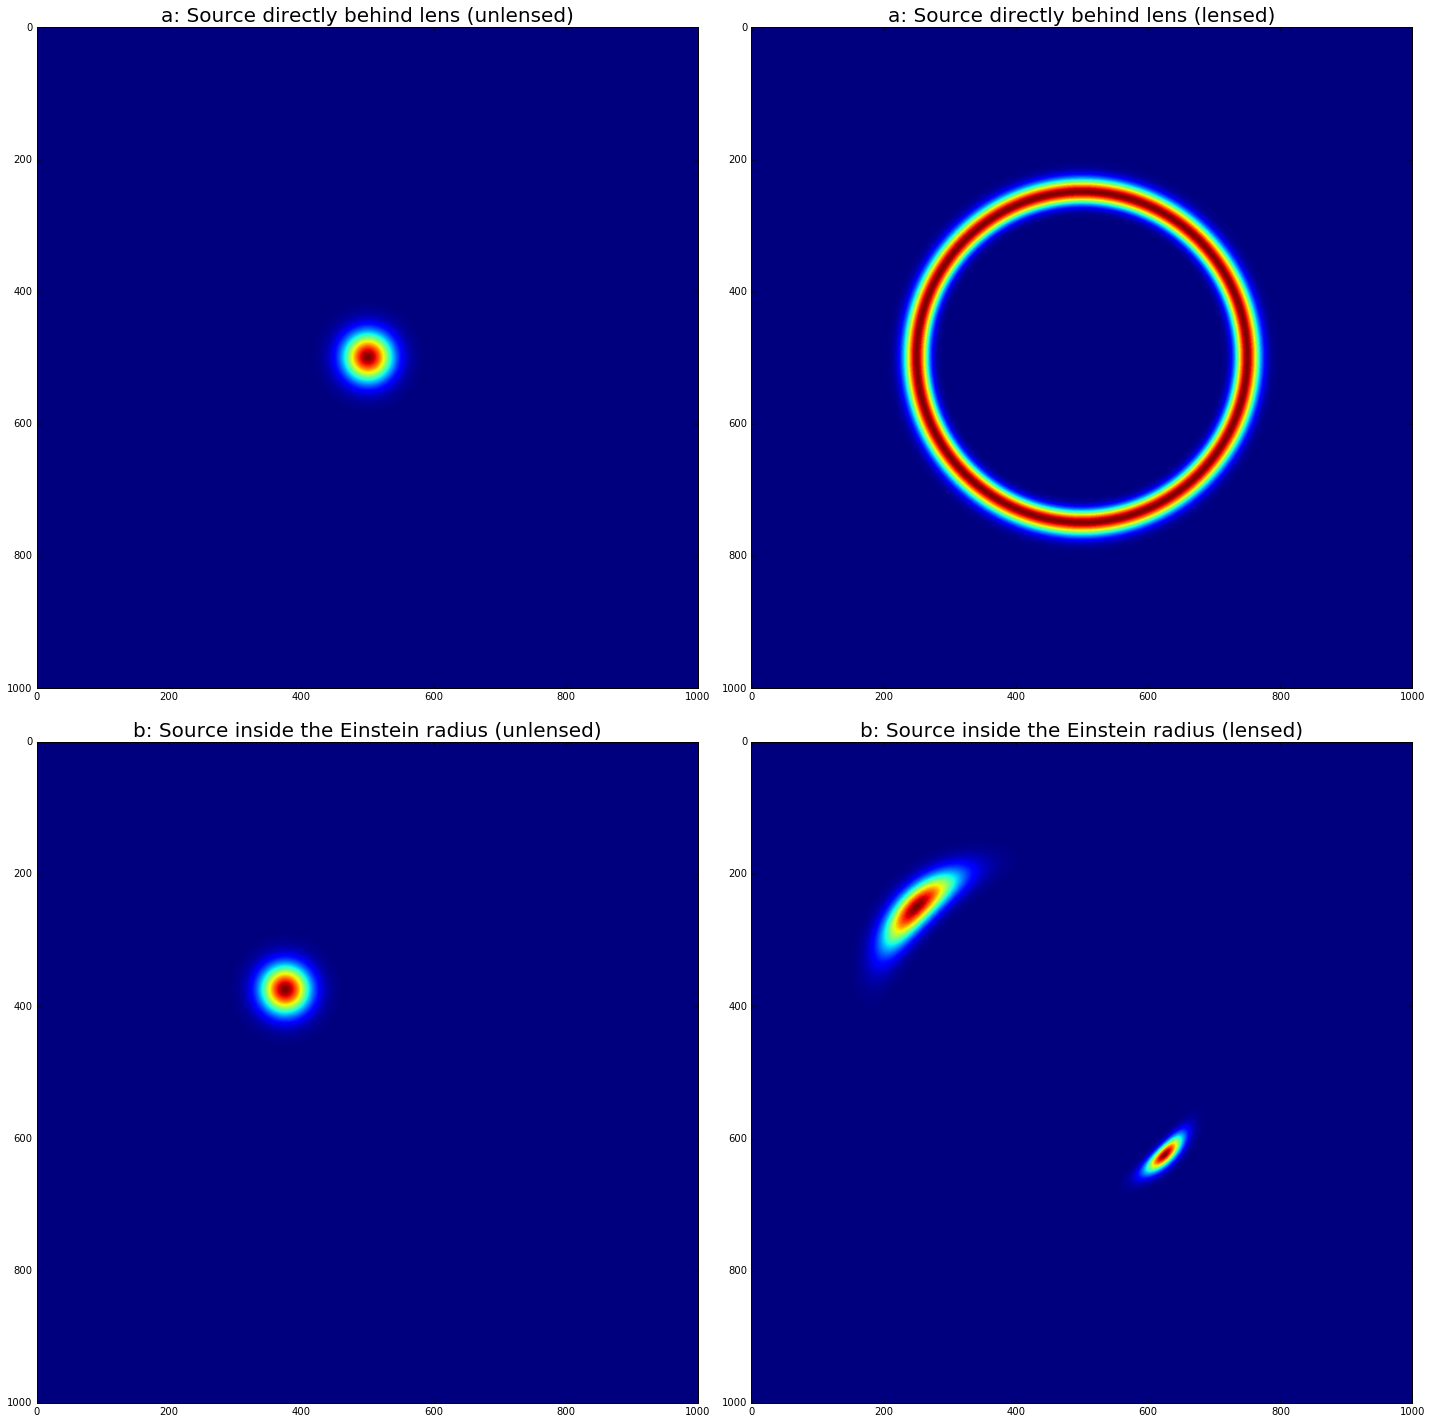

In [355]:
#plots source PSF and lensed images

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0,0].imshow(Z_1)
ax[0,1].imshow(Img_1)
ax[1,0].imshow(Z_2)
ax[1,1].imshow(Img_2)

ax[0,0].set_title('a: Source directly behind lens (unlensed)', fontsize=20)
ax[0,1].set_title('a: Source directly behind lens (lensed)', fontsize=20)
ax[1,0].set_title('b: Source inside the Einstein radius (unlensed)', fontsize=20)
ax[1,1].set_title('b: Source inside the Einstein radius (lensed)', fontsize=20)
fig.tight_layout()
plt.show()

In [356]:
#applied to the Hydra Cluster

img = mpimg.imread('Hydra.jpg')
Val_3 = img.ravel()[idx]
Img_3 = np.asarray(Val_3).reshape(1000, 1000)

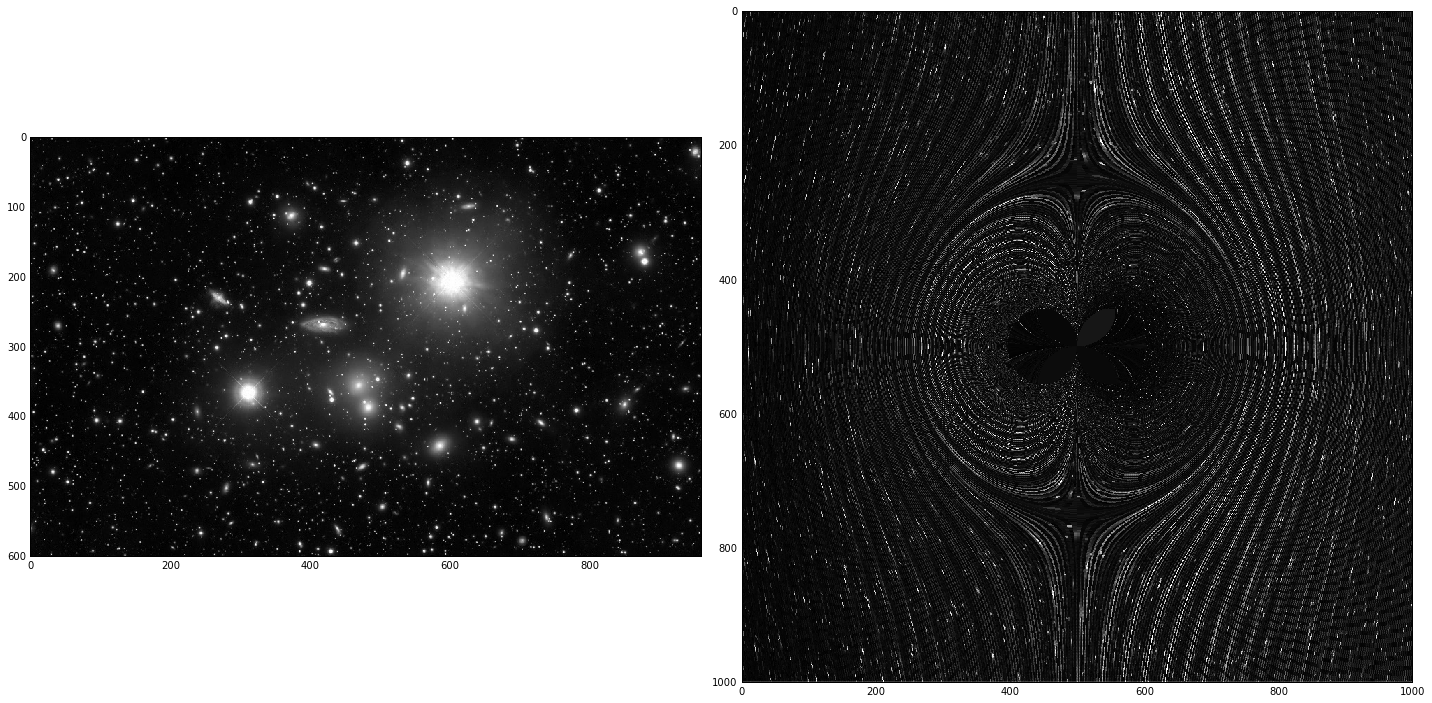

In [357]:
fig,(bx1,bx2) = plt.subplots(1, 2, figsize=(20,20))
bx1.imshow(img[:,:,0], cmap='gray', interpolation='none')
bx2.imshow(Img_3, cmap='gray', interpolation='none')
fig.tight_layout()